In [ ]:
# Execute this once, the first time you run
!pip install networkx

# Disable Python warning messages - you should probably only run this before submission

import warnings
warnings.filterwarnings('ignore')

## Step 2.1 Spark Setup

In [1]:
# TODO: Connect to Spark as per Step 2.1
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

spark = SparkSession.builder.appName('Graphs-HW2').getOrCreate()

In [ ]:
# Load some dummy data, which should be overwritten in Step 2.2

answers_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456},\
                                    {'from_node': 456, 'to_node': 789},
                                    {'from_node': 456, 'to_node': 890}])
comments_answers_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456}])
comments_questions_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456}])

graph_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456}])

In [ ]:
answers_sdf

## Step 2.2 Loading

In [2]:
# TODO: load data as per Step 2.2
answers_sdf = spark.read.load('sx-stackoverflow-a2q.txt', format="text")

In [333]:
answers_sdf.count()

17823525

In [334]:
answers_sdf.show(10)

+---------+-------+----------+
|from_node|to_node|    answer|
+---------+-------+----------+
|        9|      8|1217567877|
|        1|      1|1217573801|
|       13|      1|1217606247|
|       17|      1|1217617639|
|       48|      2|1217618182|
|       17|      1|1217618239|
|       19|      9|1217618357|
|       13|     23|1217618560|
|       13|     11|1217618799|
|       23|     23|1217619360|
+---------+-------+----------+
only showing top 10 rows



In [335]:
answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- answer: integer (nullable = true)



In [3]:
comments_answers_sdf = spark.read.load('sx-stackoverflow-c2a.txt', format="text")

In [336]:
comments_answers_sdf.count()

25405374

In [337]:
comments_answers_sdf.show(10)

+---------+-------+-----------------+
|from_node|to_node|comment-on-answer|
+---------+-------+-----------------+
|        1|     91|       1220713630|
|        3|     91|       1220713792|
|      380|    350|       1220715736|
|     4642|   2257|       1220734307|
|     4642|1324220|       1220735746|
|     2495|   4285|       1220736640|
|     4642|   4893|       1220737355|
|     2515|   4903|       1220738560|
|     2515|   4893|       1220739071|
|      199|    199|       1220741079|
+---------+-------+-----------------+
only showing top 10 rows



In [338]:
comments_answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- comment-on-answer: string (nullable = true)



In [4]:
comments_questions_sdf = spark.read.load('sx-stackoverflow-c2q.txt', format="text")

In [339]:
comments_questions_sdf.count()

20268151

In [340]:
comments_questions_sdf.show(10)

+---------+-------+-------------------+
|from_node|to_node|comment-on-question|
+---------+-------+-------------------+
|     4550|   4550|         1220729190|
|      242|    184|         1220733503|
|     4213|   4946|         1220768149|
|       91|     91|         1220768295|
|     2658|   1874|         1220771891|
|     4035|   1874|         1220773037|
|     2257|   4489|         1220802041|
|      577|    577|         1220834891|
|     4489|   4489|         1220853536|
|      828|   2783|         1220854143|
+---------+-------+-------------------+
only showing top 10 rows



In [341]:
comments_questions_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- comment-on-question: string (nullable = true)



In [ ]:
# You may add as many cells as you like here.
# Use Insert | Insert Cell Below

## Step 2.2 Results

In [34]:
answers_sdf.count()

17823525

In [342]:
answers_sdf.show()

+---------+-------+----------+
|from_node|to_node|    answer|
+---------+-------+----------+
|        9|      8|1217567877|
|        1|      1|1217573801|
|       13|      1|1217606247|
|       17|      1|1217617639|
|       48|      2|1217618182|
|       17|      1|1217618239|
|       19|      9|1217618357|
|       13|     23|1217618560|
|       13|     11|1217618799|
|       23|     23|1217619360|
|       35|     33|1217620542|
|       39|     33|1217620597|
|       43|     22|1217620971|
|       17|     32|1217621272|
|       39|     40|1217621416|
|       37|     40|1217621670|
|       45|     45|1217621917|
|       17|     17|1217622124|
|       49|     13|1217623079|
|       13|     23|1217623216|
+---------+-------+----------+
only showing top 20 rows



In [343]:
answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- answer: integer (nullable = true)



In [344]:
comments_answers_sdf.count()

25405374

In [345]:
comments_answers_sdf.show(10)

+---------+-------+-----------------+
|from_node|to_node|comment-on-answer|
+---------+-------+-----------------+
|        1|     91|       1220713630|
|        3|     91|       1220713792|
|      380|    350|       1220715736|
|     4642|   2257|       1220734307|
|     4642|1324220|       1220735746|
|     2495|   4285|       1220736640|
|     4642|   4893|       1220737355|
|     2515|   4903|       1220738560|
|     2515|   4893|       1220739071|
|      199|    199|       1220741079|
+---------+-------+-----------------+
only showing top 10 rows



In [346]:
comments_answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- comment-on-answer: string (nullable = true)



In [347]:
comments_questions_sdf.count()

20268151

In [348]:
comments_questions_sdf.show(10)

+---------+-------+-------------------+
|from_node|to_node|comment-on-question|
+---------+-------+-------------------+
|     4550|   4550|         1220729190|
|      242|    184|         1220733503|
|     4213|   4946|         1220768149|
|       91|     91|         1220768295|
|     2658|   1874|         1220771891|
|     4035|   1874|         1220773037|
|     2257|   4489|         1220802041|
|      577|    577|         1220834891|
|     4489|   4489|         1220853536|
|      828|   2783|         1220854143|
+---------+-------+-------------------+
only showing top 10 rows



In [349]:
comments_questions_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- comment-on-question: string (nullable = true)



## Step 2.3

In [6]:
# TODO: wrangling work in Step 2.3.  Add as many Cells as you need
from pyspark.sql.functions import *
from pyspark.sql.types import * 

In [7]:
split_col = split(answers_sdf['value'], ' ')

answers_sdf = answers_sdf.withColumn('from_node', split_col.getItem(0))
answers_sdf = answers_sdf.withColumn('to_node', split_col.getItem(1))
answers_sdf = answers_sdf.withColumn("answer", split_col.getItem(2))

answers_sdf = answers_sdf.drop("value")

answers_sdf = answers_sdf.withColumn('from_node', answers_sdf["from_node"].cast(IntegerType()))
answers_sdf = answers_sdf.withColumn('to_node', answers_sdf["to_node"].cast(IntegerType()))
answers_sdf = answers_sdf.withColumn('answer', answers_sdf["answer"].cast(IntegerType()))

answers_sdf.show(10)

+---------+-------+----------+
|from_node|to_node|    answer|
+---------+-------+----------+
|        9|      8|1217567877|
|        1|      1|1217573801|
|       13|      1|1217606247|
|       17|      1|1217617639|
|       48|      2|1217618182|
|       17|      1|1217618239|
|       19|      9|1217618357|
|       13|     23|1217618560|
|       13|     11|1217618799|
|       23|     23|1217619360|
+---------+-------+----------+
only showing top 10 rows



In [8]:
split_col_comments = split(comments_answers_sdf['value'], ' ')

comments_answers_sdf = comments_answers_sdf.withColumn('from_node', split_col_comments.getItem(0))
comments_answers_sdf = comments_answers_sdf.withColumn('to_node', split_col_comments.getItem(1))
comments_answers_sdf = comments_answers_sdf.withColumn("comment-on-answer", split_col_comments.getItem(2))

comments_answers_sdf = comments_answers_sdf.drop("value")

comments_answers_sdf = comments_answers_sdf.withColumn('from_node', comments_answers_sdf["from_node"].cast(IntegerType()))
comments_answers_sdf = comments_answers_sdf.withColumn('to_node', comments_answers_sdf["to_node"].cast(IntegerType()))
#comments_answers_sdf = comments_answers_sdf.withColumn('answer', comments_answers_sdf["answer"].cast(IntegerType()))

comments_answers_sdf.show(10)

+---------+-------+-----------------+
|from_node|to_node|comment-on-answer|
+---------+-------+-----------------+
|        1|     91|       1220713630|
|        3|     91|       1220713792|
|      380|    350|       1220715736|
|     4642|   2257|       1220734307|
|     4642|1324220|       1220735746|
|     2495|   4285|       1220736640|
|     4642|   4893|       1220737355|
|     2515|   4903|       1220738560|
|     2515|   4893|       1220739071|
|      199|    199|       1220741079|
+---------+-------+-----------------+
only showing top 10 rows



In [9]:
split_col_questions = split(comments_questions_sdf['value'], ' ')

comments_questions_sdf = comments_questions_sdf.withColumn('from_node', split_col_questions.getItem(0))
comments_questions_sdf = comments_questions_sdf.withColumn('to_node', split_col_questions.getItem(1))
comments_questions_sdf = comments_questions_sdf.withColumn("comment-on-question", split_col_questions.getItem(2))

comments_questions_sdf = comments_questions_sdf.drop("value")

comments_questions_sdf = comments_questions_sdf.withColumn('from_node', comments_questions_sdf["from_node"].cast(IntegerType()))
comments_questions_sdf = comments_questions_sdf.withColumn('to_node', comments_questions_sdf["to_node"].cast(IntegerType()))
#comments_questions_sdf = comments_questions_sdf.withColumn('answer', comments_questions_sdf["comment-on-question"].cast(IntegerType()))

comments_questions_sdf.show(10)


+---------+-------+-------------------+
|from_node|to_node|comment-on-question|
+---------+-------+-------------------+
|     4550|   4550|         1220729190|
|      242|    184|         1220733503|
|     4213|   4946|         1220768149|
|       91|     91|         1220768295|
|     2658|   1874|         1220771891|
|     4035|   1874|         1220773037|
|     2257|   4489|         1220802041|
|      577|    577|         1220834891|
|     4489|   4489|         1220853536|
|      828|   2783|         1220854143|
+---------+-------+-------------------+
only showing top 10 rows



In [20]:
temp_sdf = answers_sdf.unionAll(comments_questions_sdf)
graph_sdf = temp_sdf.unionAll(comments_answers_sdf)
graph_sdf.show(10)

+---------+-------+----------+
|from_node|to_node|    answer|
+---------+-------+----------+
|        9|      8|1217567877|
|        1|      1|1217573801|
|       13|      1|1217606247|
|       17|      1|1217617639|
|       48|      2|1217618182|
|       17|      1|1217618239|
|       19|      9|1217618357|
|       13|     23|1217618560|
|       13|     11|1217618799|
|       23|     23|1217619360|
+---------+-------+----------+
only showing top 10 rows



## Step 2.3 Results

In [10]:
answers_sdf.count()

17823525

In [11]:
answers_sdf.show(5)

+---------+-------+----------+
|from_node|to_node|    answer|
+---------+-------+----------+
|        9|      8|1217567877|
|        1|      1|1217573801|
|       13|      1|1217606247|
|       17|      1|1217617639|
|       48|      2|1217618182|
+---------+-------+----------+
only showing top 5 rows



In [12]:
answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- answer: integer (nullable = true)



In [13]:
comments_answers_sdf.count()

25405374

In [14]:
comments_answers_sdf.show(5)

+---------+-------+-----------------+
|from_node|to_node|comment-on-answer|
+---------+-------+-----------------+
|        1|     91|       1220713630|
|        3|     91|       1220713792|
|      380|    350|       1220715736|
|     4642|   2257|       1220734307|
|     4642|1324220|       1220735746|
+---------+-------+-----------------+
only showing top 5 rows



In [15]:
comments_answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- comment-on-answer: string (nullable = true)



In [16]:
 comments_questions_sdf.count()

20268151

In [17]:
comments_questions_sdf.show(5)

+---------+-------+-------------------+
|from_node|to_node|comment-on-question|
+---------+-------+-------------------+
|     4550|   4550|         1220729190|
|      242|    184|         1220733503|
|     4213|   4946|         1220768149|
|       91|     91|         1220768295|
|     2658|   1874|         1220771891|
+---------+-------+-------------------+
only showing top 5 rows



In [18]:
comments_questions_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- comment-on-question: string (nullable = true)



In [21]:
graph_sdf.count()

63497050

In [22]:
graph_sdf.show(5)

+---------+-------+----------+
|from_node|to_node|    answer|
+---------+-------+----------+
|        9|      8|1217567877|
|        1|      1|1217573801|
|       13|      1|1217606247|
|       17|      1|1217617639|
|       48|      2|1217618182|
+---------+-------+----------+
only showing top 5 rows



In [23]:
graph_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- answer: string (nullable = true)



## Step 2.4

In [24]:
# You may put any computations you need here

graph_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- answer: string (nullable = true)



## Step 2.4.1 Results

In [25]:
# TODO: output dataframe with top 10 users by number of questions
most_answers_sdf = answers_sdf.groupBy("from_node")
count = most_answers_sdf.count()
count.sort(desc("count")).show(10)

+---------+-----+
|from_node|count|
+---------+-----+
|    22656|32030|
|  1144035|25146|
|    29407|20842|
|   548225|16944|
|   157882|16615|
|   115145|16515|
|    17034|15437|
|   100297|15020|
|     6309|14291|
|    34397|14033|
+---------+-----+
only showing top 10 rows



In [27]:
# TODO: output top 10 users by number of answers to questions by distinct users
answers_sdf.createOrReplaceTempView('my_sdf')
spark.sql('SELECT from_node, COUNT(DISTINCT to_node) as Count_Answers from my_sdf group by from_node ORDER BY Count_answers DESC').show(10)


+---------+-------------+
|from_node|Count_Answers|
+---------+-------------+
|    22656|        22860|
|  1144035|        21032|
|   548225|        14127|
|    29407|        13043|
|   115145|        12243|
|    19068|        12114|
|   100297|        11486|
|    34397|        11368|
|    17034|        11347|
|     6309|        11057|
+---------+-------------+
only showing top 10 rows



## Step 2.4.2 Results

In [28]:
# TODO: number of users whose questions have never been answered or commented on
to_ignore = comments_questions_sdf.select('to_node').subtract(answers_sdf.select('to_node')).collect()
ignored_users = [item[0] for item in to_ignore]
print(len(ignored_users))

150681


In [102]:
mutual.show()

+---------+-------+----------+---------+-------+----------+
|from_node|to_node|    answer|from_node|to_node|    answer|
+---------+-------+----------+---------+-------+----------+
|   350858| 630238|1333992527|     null|   null|      null|
|       17|      1|1217617639|        1|     17|1228255973|
|       17|      1|1217618239|        1|     17|1228255973|
|   865038|1136709|1333992498|     null|   null|      null|
|  3046513|3065567|1386369092|     null|   null|      null|
|  1622493|4932661|1436514774|     null|   null|      null|
|       50|     37|1217623475|     null|   null|      null|
|  2559906|1951607|1436514928|     null|   null|      null|
|       43|     22|1217620971|     null|   null|      null|
|  2844234|4980054|1436514984|     null|   null|      null|
|  1755565|1755565|1386369042|  1755565|1755565|1386350706|
|  1755565|1755565|1386369042|  1755565|1755565|1386369042|
|  1755565|1755565|1386369042|  1755565|1755565|1393962196|
|  3439404|5100231|1436514773|     null|

## Step 2.4.3 Results

In [134]:
# TODO: top 10 pairs of users by mutual answers, along with the number of questions they have mutually answered

from_mutual = spark.sql('SELECT from_node, to_node, count(*) as count FROM my_answers_sdf GROUP BY from_node, to_node')
from_mutual.createOrReplaceTempView('from_mutual_view')

mutual_n = spark.sql('SELECT a1.from_node, a1.to_node, a1.count+IFNULL(a2.count, 0) as Count from from_mutual_view as a1 LEFT JOIN from_mutual_view as a2 ON a1.from_node = a2.to_node AND a1.to_node = a2.from_node WHERE a1.from_node != a1.to_node ORDER BY Count DESC')
mutual_n.show(10)

+---------+-------+-----+
|from_node|to_node|Count|
+---------+-------+-----+
|   315935| 742402|  155|
|   217408|2258442|  105|
|     6309| 399145|   81|
|   157882|1391249|   78|
|     6309| 470184|   76|
|   157882| 240337|   76|
|    91299| 167454|   73|
|   505088|  46207|   72|
|   505088| 988445|   69|
|   366797|  15168|   65|
+---------+-------+-----+
only showing top 10 rows



# Step 3

In [40]:
# TODO: remove these, which just create dummy data
# TODO: Fill in according to HW spec
graph_sdf.createOrReplaceTempView('my_sdf')

highest_indegree_sdf = spark.sql('SELECT to_node, COUNT(from_node) as Count_Answers from my_sdf group by to_node ORDER BY Count_answers DESC')
highest_outdegree_sdf = spark.sql('SELECT from_node, COUNT(to_node) as Count_Answers from my_sdf group by from_node ORDER BY Count_answers DESC')


## Step 3 Results

In [41]:
highest_indegree_sdf.show(5)

+-------+-------------+
|to_node|Count_Answers|
+-------+-------------+
|  22656|        93143|
| 548225|        54410|
|  29407|        45824|
| 157882|        39576|
|1144035|        38909|
+-------+-------------+
only showing top 5 rows



In [42]:
highest_outdegree_sdf.show(5)

+---------+-------------+
|from_node|Count_Answers|
+---------+-------------+
|    22656|       101663|
|   505088|        65522|
|    17034|        65260|
|  1491895|        62746|
|   100297|        54330|
+---------+-------------+
only showing top 5 rows



## Step 4

In [ ]:
# TODO: insert code as you like
comments_questions_sdf.show(20)

In [307]:
#
# Step 4.1 Pre-processing
#
def spark_bfs(G, origins, max_depth):
    
    ##Your logic goes here
    visited = []
    results = []
    origins = [(4550,0), (242,0)] 
    depth = 0
    frontier = spark.createDataFrame(origins, ['node','depth'])
    frontier = frontier.drop(frontier.depth)
    visited = spark.createDataFrame(origins,['node','depth'])
    while depth < max_depth:
        frontier = frontier.distinct()
        #depth += 1
        G.createOrReplaceTempView("graph")
        frontier.createOrReplaceTempView("front")
        
        connected = spark.sql('SELECT to_node as node1 from graph JOIN front ON graph.from_node = front.node')
        
        connected = connected.join(visited, col('node1') == col('node'), "left_anti")
        connected = connected.join(frontier, col('node1') == col('node'), "left_anti")
        
        frontier = connected
        connected = connected.withColumn("depth", F.lit(depth+1))
        
        visited = visited.union(connected)
        visited = visited.withColumnRenamed("node1", "node")
        frontier = frontier.withColumnRenamed("node1", "node")
        
        
        depth += 1
    return visited

In [309]:
bfs_sdf.printSchema()

root
 |-- node: long (nullable = true)
 |-- depth: long (nullable = true)



## Step 4.1

In [308]:
# TODO: comment out this line once your code is ready
#bfs_sdf = spark.createDataFrame([{'node': 123, 'depth': 1}, {'node': 456, 'depth': 2}])

# TODO: enable this once your code is ready
origin_map = [{'node': 4550}, {'node': 242}]
bfs_sdf = spark_bfs(comments_questions_sdf, origin_map, 2)
bfs_sdf.count()

396

In [310]:
# TODO: insert code as you like
bfs_sdf.show(396)

+-------+-----+
|   node|depth|
+-------+-----+
|   4550|    0|
|    242|    0|
|   1551|    1|
|3047450|    1|
|    184|    1|
|3664405|    1|
|4569974|    1|
| 818089|    1|
| 633513|    1|
|  67719|    1|
|4493776|    1|
|1940564|    1|
|1139389|    1|
|2332659|    1|
|5070920|    1|
| 602291|    1|
|5504881|    1|
|1619254|    1|
|2705465|    1|
|  45459|    1|
|3290688|    1|
| 171136|    1|
|3240545|    1|
|2605058|    1|
|4773326|    1|
|2495819|    1|
| 451383|    1|
|1684384|    1|
| 299990|    1|
| 299990|    1|
|1363420|    2|
|4837375|    2|
|   7850|    2|
| 104015|    2|
| 104015|    2|
| 109859|    2|
|4528671|    2|
| 184262|    2|
| 344398|    2|
|2415802|    2|
| 207020|    2|
| 742030|    2|
|4929435|    2|
| 259579|    2|
|  11194|    2|
| 142468|    2|
| 158297|    2|
| 594423|    2|
| 140937|    2|
|3963201|    2|
| 713813|    2|
| 713813|    2|
| 194574|    2|
| 463561|    2|
|  14101|    2|
| 285193|    2|
|  61145|    2|
|  42595|    2|
|4800193|    2|
|4800193

## Step 4.1 Results

In [ ]:
bfs_sdf.show(10)

## Step 4.2

In [325]:
#
# Step 4.2 Pre-processing
#
from itertools import product
from collections import Counter
bfs_sdf_vals = bfs_sdf.collect()

def friend_rec(input_sdf, graph_sdf):
    result = []
    input_nodes = list(input_sdf.collect())
    input_nodes = [ip[0] for ip in input_nodes]
    for elem in input_nodes:
        from_nodes = graph_sdf.select('from_node', 'to_node').where(graph_sdf.from_node == elem)
        temp = list(from_nodes.select('to_node').collect())
        temp = [i[0] for i in temp]
        for item in input_nodes:
            if item not in temp and item != elem:
                result.append((elem, item))
    
    friend_recommendations_sdf = spark.createDataFrame(result, ['node1', 'node2'])
    return friend_recommendations_sdf

In [332]:
# TODO: insert code as you like


In [326]:
# TODO: comment this line out when your function works
from collections import Counter

depth_two = bfs_sdf.select('node').where('depth == 2').groupby('node').count()
#print(depth_two.count())
filtered_bfs_sdf = depth_two.select('node').where('count > 1')
filtered_bfs_sdf.drop('count')

friend_recommendations_sdf = friend_rec(filtered_bfs_sdf, comments_questions_sdf)
friend_recommendations_sdf.count()
#filtered_bfs_sdf.printSchema()

1721

In [331]:
filtered_bfs_sdf.count()

42

## Step 4.2 Results

In [330]:
friend_recommendations_sdf.show(1721)

+-------+-------+
|  node1|  node2|
+-------+-------+
|1127460|  27483|
|1127460|  63775|
|1127460|  60602|
|1127460|2269511|
|1127460|  65120|
|1127460|1061543|
|1127460|  46646|
|1127460| 830423|
|1127460|4204628|
|1127460|  24872|
|1127460| 318811|
|1127460|1894566|
|1127460| 211452|
|1127460|  55503|
|1127460| 132640|
|1127460| 267679|
|1127460| 238419|
|1127460|  59017|
|1127460|1187554|
|1127460| 282194|
|1127460| 102427|
|1127460| 393268|
|1127460|5947929|
|1127460| 503032|
|1127460|1218595|
|1127460|  76028|
|1127460| 397185|
|1127460| 104015|
|1127460| 713813|
|1127460|  61299|
|1127460|  21918|
|1127460|3830157|
|1127460|1406214|
|1127460|4595831|
|1127460| 139605|
|1127460|1038179|
|1127460|4899760|
|1127460|4800193|
|1127460|  47550|
|1127460| 453447|
|1127460|3565829|
|  27483|1127460|
|  27483|  63775|
|  27483|  60602|
|  27483|2269511|
|  27483|  65120|
|  27483|1061543|
|  27483|  46646|
|  27483| 830423|
|  27483|4204628|
|  27483|  24872|
|  27483| 318811|
|  27483|1

## Step 4.3: Graph visualization

### Once you have excecuted the cells in Step 4.2 and you have friend_recommendations_sdf, lets create friend_recommendations_df using toPandas(). This creates an in-memory dataFrame that we can use to build the graph. Here we have used ('from_node','to_node') as column names in friend_recommendations_sdf, please change it to what you have used in yours.

In [327]:
import networkx as nx

# TODO: create friend_graph NetworkX graph from friend_recommendations_df from friend_recommendations_sdf
friends_recommendation_pandas = friend_recommendations_sdf.toPandas()
friend_graph = nx.from_pandas_dataframe(friends_recommendation_pandas, 'node1','node2')

## Step 4.3 Results

In [328]:
print ("Number of nodes (characters) in this graph is", friend_graph.order()) # number of nodes
print ("Number of edges in this graph is", len(friend_graph.edges())) # number of edges
print ("Graph diameter is", nx.diameter(friend_graph)) # maximum eccentricity

Number of nodes (characters) in this graph is 42
Number of edges in this graph is 861
Graph diameter is 1


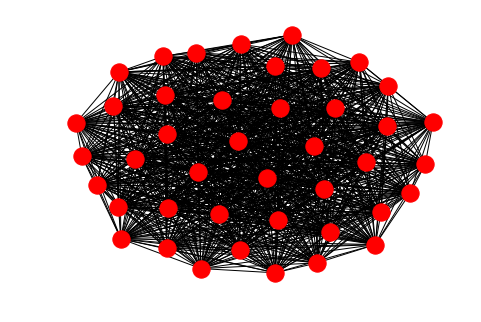

In [329]:
%matplotlib inline
nx.draw(friend_graph)